### Prime numbers recognition

In this file we train a binary classifier on a subset of the MNIST set, in which we distinguish classes (digits 0 and 1 are to be excluded from the set):

* Prime numbers (2,3,5,7)
* Complex numbers (4,6,8,9)

### Model testing

We test our model with different parameters. Parameters such as number of iterations, threshold or number of samples differ and we can observe how it affects the whole model and its outcome.

### Downloading packages and preparing notebook for training models

In [1]:
# required packages installation

!pip install -r ../requirements.txt

  Using cached https://files.pythonhosted.org/packages/29/c1/24814557f1d22c56d50280771a17307e6bf87b70727d975fd6b2ce6b014a/requests-2.25.1-py2.py3-none-any.whl
     |████████████████████████████████| 8.5MB 1.8MB/s eta 0:00:01
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp37-none-any.whl size=7905 sha256=664ceee2f99a8d1d96bda7cc47a2a255799e72410380ece41474c13d9ed2acb1
  Stored in directory: /Users/kamil/Library/Caches/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=9cc552d7fc476ce0e35cb5bd2a2d6751ef9e35b96784c11b3f62b9c90e8df1bb
  Stored in directory: /Users/kamil/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built idx2numpy sklearn
  Found existing installation: idx2numpy 1.2.2
    Uninstalling idx2numpy-1.2.2:
      Successfully uninstalled idx2numpy-1.2.2
  Found existing installation: requests 2.24.0
    Uninst

In [1]:
# importing model and required components
from core.models import LogisticRegression
from core.optimizers import *
from core.regularizers import *

# imports for data loading
from requests import get
import idx2numpy
import gzip
import shutil
import os

# import for data processing and analysis
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# warnings ignoring
import warnings; warnings.simplefilter('ignore')

### Data loading

#### This section is responsible for downloading the data on which our model will be trained in many scenarios - with variety of different:
- number of samples
- number of iterations
- thresholds

In [2]:
# data downloading and preprocessing function
        
def load_data():
    
    urls = []
    urls.append('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
    urls.append('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
    urls.append('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
    urls.append('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')
    
    print('Downloading data...')
    responses = [get(url, allow_redirects=True) for url in urls]
    
    names = ['train_images', 'train_labels', 'test_images', 'test_labels']
    
    for index, response in enumerate(responses):
        open(f'./datasets/prime_numbers/{names[index]}-gz', 'wb').write(response.content)
        
    print('Unpacking files...')
    for name in names:
        with gzip.open(f'./datasets/prime_numbers/{name}-gz', 'rb') as f_in:
            with open(f'./datasets/prime_numbers/{name}', 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
 
    for name in names:
        os.remove(f'./datasets/prime_numbers/{name}-gz')

    f_read = open('./datasets/prime_numbers/train_images','rb')
    X_train = idx2numpy.convert_from_file(f_read)

    f_read = open('./datasets/prime_numbers/train_labels', 'rb')
    y_train = idx2numpy.convert_from_file(f_read)

    f_read = open('./datasets/prime_numbers/test_images', 'rb')
    X_test = idx2numpy.convert_from_file(f_read)
    
    f_read = open('./datasets/prime_numbers/test_labels', 'rb')
    y_test = idx2numpy.convert_from_file(f_read)


    X_train = X_train.reshape(len(X_train), 784)
    X_test = X_test.reshape(len(X_test), 784)


    tmp_X = []
    tmp_y = []

    for index,label in enumerate(y_train):
        if label in [2,3,5,7]:
            tmp_X.append(X_train[index])
            tmp_y.append(1)
        elif label in [4,6,8,9]:
            tmp_X.append(X_train[index])
            tmp_y.append(0)

    tmp_X_test = []
    tmp_y_test = []

    for index,label in enumerate(y_test):
        if label in [2,3,5,7]:
            tmp_X_test.append(X_test[index])
            tmp_y_test.append(1)
        elif label in [4,6,8,9]:
            tmp_X_test.append(X_test[index])
            tmp_y_test.append(0)


    X_train = np.array(tmp_X)
    X_test = np.array(tmp_X_test)
    y_train = np.array(tmp_y)
    y_test = np.array(tmp_y_test)
    
    print('Data loading finished!')
    
    return X_train, X_test, y_train, y_test

In [3]:
# data loading

X_train_raw, X_test, y_train_raw, y_test = load_data()

Unpacking files...
Data loading finished!


## Data visualization

#### Number of training and testing samples + Single Record Visualization

Num of our training samples: 	 47335
Num of our testing samples: 	 7885


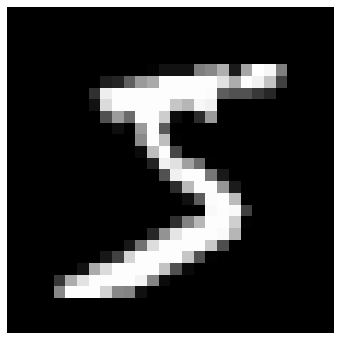

In [4]:
print("Num of our training samples: \t", X_train_raw.shape[0])
print("Num of our testing samples: \t", X_test.shape[0])

number = np.reshape(X_train_raw[0], (28,28))

plt.figure(figsize=(6, 6))
plt.imshow(number, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
print(X_train_raw[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

#### Training sample

##### Examples with labels attached

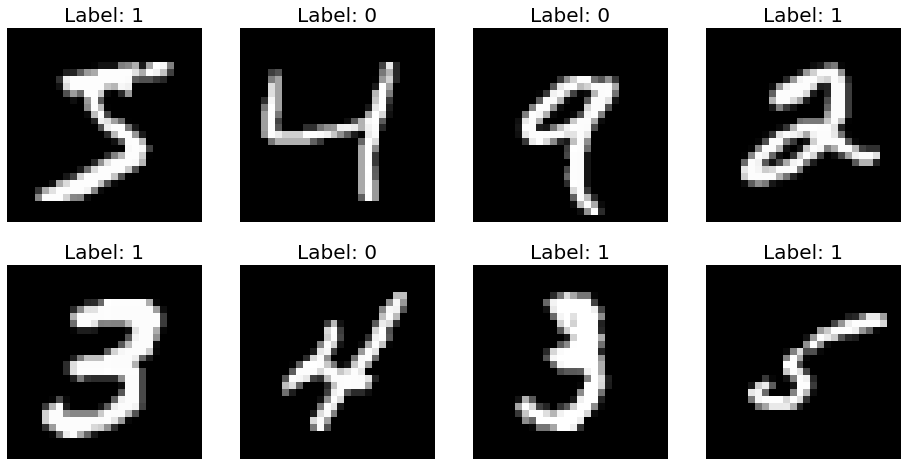

In [6]:
plt.figure(figsize=(16,8))

for i, (X, label) in enumerate(zip(X_train_raw[0:8], y_train_raw[0:8])):
    plt.subplot(2, 4, i + 1)
    plt.title(f'Label: {label}', fontsize = 20)
    plt.axis('off')
    plt.imshow(np.reshape(X, (28,28)), cmap='gray')
plt.show()

#### Taking num of samples we want to train our model on 

In [7]:
num_of_samples = 10000

X_train = X_train_raw[:num_of_samples]
y_train = y_train_raw[:num_of_samples]

## Default model efficienty

#### Cross validation score determination on model with default parameters

In [8]:
model = LogisticRegression()
result = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', error_score='raise')

In [9]:
print('Cross validation result')
print(result)
print('Cross validation mean')
print(np.mean(result))

Cross validation result
[0.9125 0.881  0.912  0.8985 0.82  ]
Cross validation mean
0.8847999999999999


## Optimizers testing

##### A Classification report is used to measure the quality of predictions from a classification algorithm. 
##### Main scores: 
##### **Precision** – What percent of your predictions were correct? (Precision = TP/(TP + FP))
##### **Recall** – What percent of the positive cases did you catch? (Recall = TP/(TP+FN))
##### **F1 score** – What percent of positive predictions were correct? (F1 Score = 2*(Recall * Precision) / (Recall + Precision))


In [10]:
# appending all optimizers to check their efficiency

optimizers = [
    GradientDescentOptimizer(),
    MomentumGradientDescentOptimizer(),
    AdaGradOptimizer(),
    RMSPropOptimizer()
]

In [11]:
# regularizer=RidgeRegularizer(), num_iterations=300, threshold=0.5, fit_intercept=True, verbose=False

for optimizer in optimizers:
    model = LogisticRegression(optimizer = optimizer)
    model.fit(X_train_raw, y_train_raw)
    y_pred = model.predict(X_test)
    print("="*80)
    print(str(optimizer).center(80, ' '))
    print("="*80)
    print(classification_report(y_test, y_pred))

                 GradientDescentOptimizer(learning_rate: 0.03)                  
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3923
           1       0.91      0.91      0.91      3962

    accuracy                           0.91      7885
   macro avg       0.91      0.91      0.91      7885
weighted avg       0.91      0.91      0.91      7885

   MomentumGradientDescentOptimizer(learning_rate: 0.03, momentum_rate: 0.9)    
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3923
           1       0.93      0.89      0.91      3962

    accuracy                           0.91      7885
   macro avg       0.91      0.91      0.91      7885
weighted avg       0.91      0.91      0.91      7885

             AdaGradOptimizer(learning_rate: 0.03, epsilon: 1e-07)              
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     

## Regularizers testing

##### Regularizers allow you to apply penalties on layer parameters or layer activity during optimization. These penalties are summed into the loss function that the network optimizes. 

#### Optimizers implemented in our code:
- `Lasso` (least absolute shrinkage and selection operator) - it is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.
- `Ridge` - in general, the method provides improved efficiency in parameter estimation problems in exchange for a tolerable amount of bias.
- `ElasticNet` - it is a regularized regression method that linearly combines the L1 and L2 penalties of the above *Lasso* and *Ridge* methods.

In [12]:
# appending all regularizers to check their efficiency

regularizers = [
    LassoRegularizer(),
    RidgeRegularizer(),
    ElasticNetRegularizer()
]

#### Below we test all three optimizers

Default values provided to *LinearRegression* model are:
- *num_iterations* = 300 <- number of iterations of the optimizer algorithm
- *threshold* = 0.5 <- decision threshold
- *fit_intercept* = True <- whether to calculate the intercept for this model
- *verbose* = False <- output-related parameter

In [13]:
# optimizer = RMSPropOptimizer, num_iterations=300, threshold=0.5, fit_intercept=True, verbose=False

for regularizer in regularizers:
    model = LogisticRegression(regularizer = regularizer)
    model.fit(X_train_raw, y_train_raw)
    y_pred = model.predict(X_test)
    print("="*80)
    print(str(optimizer).center(80, ' '))
    print("="*80)
    print(classification_report(y_test, y_pred))

        RMSPropOptimizer(learning_rate: 0.03, beta: 0.9, epsilon: 1e-07)        
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3923
           1       0.90      0.94      0.92      3962

    accuracy                           0.92      7885
   macro avg       0.92      0.91      0.91      7885
weighted avg       0.92      0.92      0.91      7885

        RMSPropOptimizer(learning_rate: 0.03, beta: 0.9, epsilon: 1e-07)        
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      3923
           1       0.97      0.78      0.87      3962

    accuracy                           0.88      7885
   macro avg       0.89      0.88      0.88      7885
weighted avg       0.89      0.88      0.88      7885

        RMSPropOptimizer(learning_rate: 0.03, beta: 0.9, epsilon: 1e-07)        
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     

### Different amounts of samples during model training

#### In this section we check how different amount of samples affects the whole model and how it affects scores, precision etc.

In [14]:
print('Number of all samples: ', len(X_train_raw))

Number of all samples:  47335


In [15]:
num_of_samples = [5, 100, 500, 1000, 2000, 5000, 10000, 20000]

##### Creating models with different sample number

In [16]:
for num in num_of_samples:
    model = LogisticRegression()
    model.fit(X_train_raw[:num], y_train_raw[:num])
    y_pred = model.predict(X_test)
    print(('" '+ str(num) +' samples "').center(53, '='))
    print(classification_report(y_test, y_pred))

====================" 5 samples "====================
              precision    recall  f1-score   support

           0       0.70      0.58      0.63      3923
           1       0.64      0.75      0.70      3962

    accuracy                           0.67      7885
   macro avg       0.67      0.67      0.66      7885
weighted avg       0.67      0.67      0.66      7885

===================" 100 samples "===================
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      3923
           1       0.87      0.72      0.79      3962

    accuracy                           0.81      7885
   macro avg       0.82      0.81      0.81      7885
weighted avg       0.82      0.81      0.81      7885

===================" 500 samples "===================
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      3923
           1       0.86      0.90      0.88      3962

    accuracy        

### Different amounts of iterations during model training

#### In this section we check how different amount of iterations affects the whole model and how it affects scores, precision etc.

In [17]:
num_of_iterations = [100, 300, 500, 1000, 3000]

##### Creating models with different iteration number

In [18]:
for num in num_of_iterations:
    model = LogisticRegression(num_iterations=num)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(('" '+ str(num) +' iterations "').center(53, '='))
    print(classification_report(y_test, y_pred))

==================" 100 iterations "=================
              precision    recall  f1-score   support

           0       0.97      0.58      0.73      3923
           1       0.70      0.98      0.82      3962

    accuracy                           0.78      7885
   macro avg       0.84      0.78      0.78      7885
weighted avg       0.84      0.78      0.78      7885

==================" 300 iterations "=================
              precision    recall  f1-score   support

           0       0.97      0.35      0.51      3923
           1       0.60      0.99      0.75      3962

    accuracy                           0.67      7885
   macro avg       0.79      0.67      0.63      7885
weighted avg       0.79      0.67      0.63      7885

==================" 500 iterations "=================
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3923
           1       0.88      0.94      0.91      3962

    accuracy        

### Different thresholds during model training

#### In this section we check how different amount of thresholds affects the whole model and how it affects scores, precision etc.

In [19]:
threshold = [0.3, 0.5, 0.65, 0.8]

##### Creating models with different threshold

In [20]:
for thresh in threshold:
    model = LogisticRegression(threshold=thresh)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(('" Threshold = '+ str(thresh) +' "').center(53, '='))
    print(classification_report(y_test, y_pred))

=================" Threshold = 0.3 "=================
              precision    recall  f1-score   support

           0       0.97      0.44      0.60      3923
           1       0.64      0.99      0.78      3962

    accuracy                           0.71      7885
   macro avg       0.81      0.71      0.69      7885
weighted avg       0.80      0.71      0.69      7885

=================" Threshold = 0.5 "=================
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      3923
           1       0.82      0.96      0.88      3962

    accuracy                           0.87      7885
   macro avg       0.89      0.87      0.87      7885
weighted avg       0.89      0.87      0.87      7885

=================" Threshold = 0.65 "================
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      3923
           1       0.97      0.74      0.84      3962

    accuracy        